# Westbound Traffic on I-94

In this project we will determine a few indicators of heavy traffic on I-94. These will be factors such as these, among others:
- Weather Type
- Time of Day
- Time of Week


Need to import packages for visualizations.

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

In [3]:
traffic = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')

In [4]:
print(traffic.head())

  holiday    temp  rain_1h  snow_1h  clouds_all weather_main  \
0    None  288.28      0.0      0.0          40       Clouds   
1    None  289.36      0.0      0.0          75       Clouds   
2    None  289.58      0.0      0.0          90       Clouds   
3    None  290.13      0.0      0.0          90       Clouds   
4    None  291.14      0.0      0.0          75       Clouds   

  weather_description            date_time  traffic_volume  
0    scattered clouds  2012-10-02 09:00:00            5545  
1       broken clouds  2012-10-02 10:00:00            4516  
2     overcast clouds  2012-10-02 11:00:00            4767  
3     overcast clouds  2012-10-02 12:00:00            5026  
4       broken clouds  2012-10-02 13:00:00            4918  


In [5]:
print(traffic.tail())

      holiday    temp  rain_1h  snow_1h  clouds_all  weather_main  \
48199    None  283.45      0.0      0.0          75        Clouds   
48200    None  282.76      0.0      0.0          90        Clouds   
48201    None  282.73      0.0      0.0          90  Thunderstorm   
48202    None  282.09      0.0      0.0          90        Clouds   
48203    None  282.12      0.0      0.0          90        Clouds   

          weather_description            date_time  traffic_volume  
48199           broken clouds  2018-09-30 19:00:00            3543  
48200         overcast clouds  2018-09-30 20:00:00            2781  
48201  proximity thunderstorm  2018-09-30 21:00:00            2159  
48202         overcast clouds  2018-09-30 22:00:00            1450  
48203         overcast clouds  2018-09-30 23:00:00             954  


In [6]:
print(traffic.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB
None


So there are 9 columns in this dataset, with 48204 rows of data. 

After some research into the dataset, it should be known that a station midway between Minneapolis and Saint Paul recorded this data. It also only recorded westbound traffic (from Saint Paul to Minneapolis). 

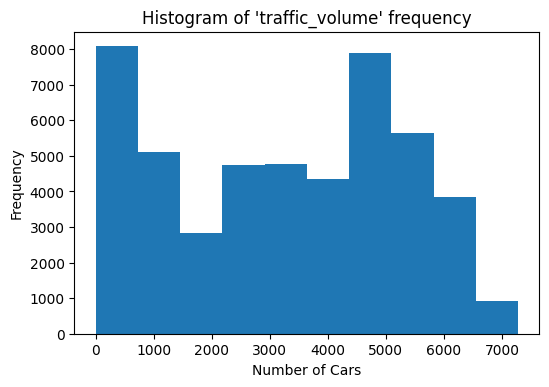

In [7]:
traffic['traffic_volume'].plot.hist()
plt.xlabel('Number of Cars')
plt.title("Histogram of 'traffic_volume' frequency")
plt.show()

In [8]:
traffic['traffic_volume'].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

25% of the time there are 1193 cars on I-95, probably correlating to night time when there is less traffic. 25% of the time there are 4933 cars, about 4x as much (and probably during the day). This leads to a logical question on comparing traffic in daytime and nighttime. 

# Daytime and Nighttime Driving

In [9]:
traffic['date_time'] = pd.to_datetime(traffic['date_time'])

In [10]:
day = traffic.copy()[(traffic['date_time'].dt.hour >= 7) & 
                  (traffic['date_time'].dt.hour < 19)]
print(day.shape)

(23877, 9)


In [11]:
night = traffic.copy()[(traffic['date_time'].dt.hour < 7) | 
                  (traffic['date_time'].dt.hour >= 19)]
print(night.shape)

(24327, 9)


Now we have two datasets, one responding to daytime and the other for nighttime. One thing great about our datasets is they have roughly equal amounts of data, separated by only 500 rows - which isn't too significant given the total amount of data. 

# Plotting Histograms for either time of day

In [12]:
day['traffic_volume'].describe()

count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [13]:
night['traffic_volume'].describe()

count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64

By getting the describe output, we know how to format our histograms, at least by the x-axis, so they are equally formatted, giving us a better representation on how they compare. 

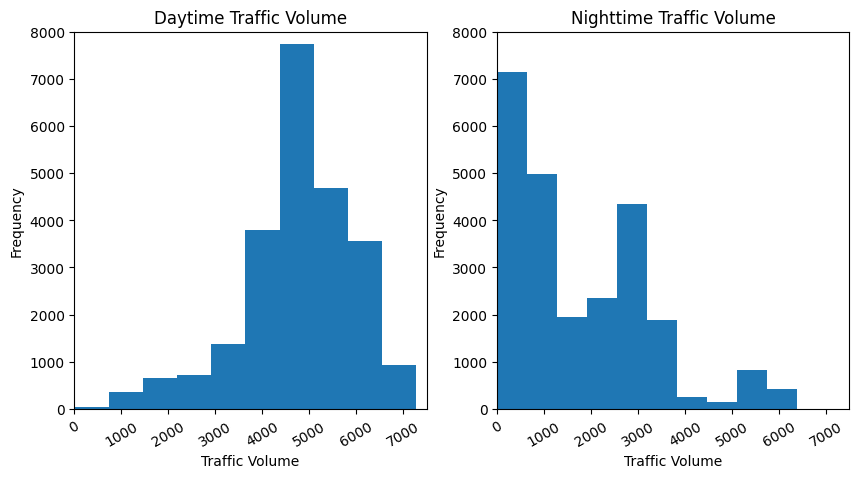

In [14]:
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
day['traffic_volume'].plot.hist()
plt.title('Daytime Traffic Volume')
plt.xlabel('Traffic Volume')
plt.ylabel('Frequency')
plt.xlim([0,7500])
plt.ylim([0,8000])
plt.xticks(rotation = 30)

plt.subplot(1,2,2)
night['traffic_volume'].plot.hist()
plt.title('Nighttime Traffic Volume')
plt.xlabel('Traffic Volume')
plt.ylabel('Frequency')
plt.xlim([0,7500])
plt.ylim([0,8000])
plt.xticks(rotation = 30)
plt.show()

From these histograms we can tell daytime traffic is left skewed, and nighttime traffic is right skewed. Nighttime traffic therefore doesn't have as many drivers compared to daytime. 

In [15]:
day.describe()

,temp,rain_1h,snow_1h,clouds_all,traffic_volume
count,23877.000000,23877.00000,23877.000000,23877.000000,23877.000000
mean,282.257596,0.53306,0.000253,53.122000,4762.047452
std,13.298885,63.62932,0.008853,37.564588,1174.546482
min,0.000000,0.00000,0.000000,0.000000,0.000000
25%,272.680000,0.00000,0.000000,5.000000,4252.000000
50%,283.780000,0.00000,0.000000,75.000000,4820.000000
75%,293.440000,0.00000,0.000000,90.000000,5559.000000
max,310.070000,9831.30000,0.510000,100.000000,7280.000000


In [16]:
night.describe()

,temp,rain_1h,snow_1h,clouds_all,traffic_volume
count,24327.000000,24327.000000,24327.000000,24327.000000,24327.000000
mean,280.173600,0.139145,0.000192,45.672011,1785.377441
std,13.296357,1.110872,0.007434,40.048382,1441.951197
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,271.700000,0.000000,0.000000,1.000000,530.000000
50%,281.379000,0.000000,0.000000,40.000000,1287.000000
75%,290.700000,0.000000,0.000000,90.000000,2819.000000
max,307.680000,55.630000,0.510000,100.000000,6386.000000


Nighttime has much less traffic compared to nighttime, perhaps we shouldn't include this data when analyzing traffic?

# Daytime Traffic Based on Time

One of the possible indicators of heavy traffic is time. There might be more people on the road in a certain motnh, on a certain day, or at a certain time of the day. 

This Chapter of analysis is based on the following parameters:
- Month
- Day of the Week
- Time of Day

In [17]:
day['month'] = day['date_time'].dt.month
by_month = day.groupby('month').mean()
by_month['traffic_volume']

month
1     4495.613727
2     4711.198394
3     4889.409560
4     4906.894305
5     4911.121609
6     4898.019566
7     4595.035744
8     4928.302035
9     4870.783145
10    4921.234922
11    4704.094319
12    4374.834566
Name: traffic_volume, dtype: float64

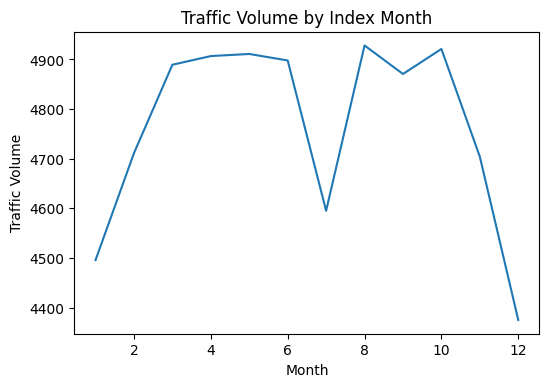

In [22]:
by_month['traffic_volume'].plot.line()
plt.title('Traffic Volume by Index Month')
plt.xlabel('Month')
plt.ylabel('Traffic Volume')
plt.show()

It's interesting that Winter Months and July have the lowest frequency of traffic on the graph. Most likely traffic decreases when it's colder in the winter, but why is July down?

Let's look at July specifically.

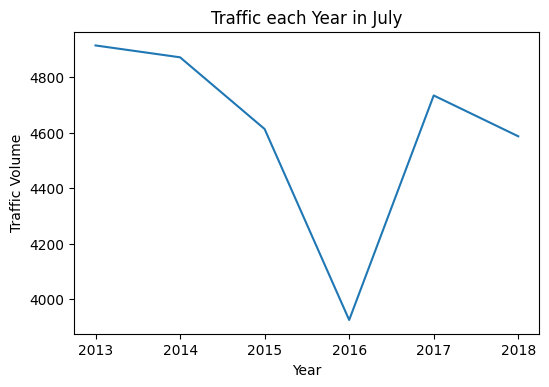

In [27]:
day['year'] = day['date_time'].dt.year
only_july = day[day['month'] == 7]
only_july.groupby('year').mean()['traffic_volume'].plot.line()
plt.title('Traffic each Year in July')
plt.xlabel('Year')
plt.ylabel('Traffic Volume')
plt.show()

It appears that most years are consistently around 4600, except for 2016. It's possible that there was construction that year, decreasing the amount of traffic flowing through I-94. 

# Traffic By Day of the Week

In [23]:
day['dayofweek'] = day['date_time'].dt.dayofweek
by_dayofweek = day.groupby('dayofweek').mean()
by_dayofweek['traffic_volume']  # 0 is Monday, 6 is Sunday

dayofweek
0    4893.551286
1    5189.004782
2    5284.454282
3    5311.303730
4    5291.600829
5    3927.249558
6    3436.541789
Name: traffic_volume, dtype: float64

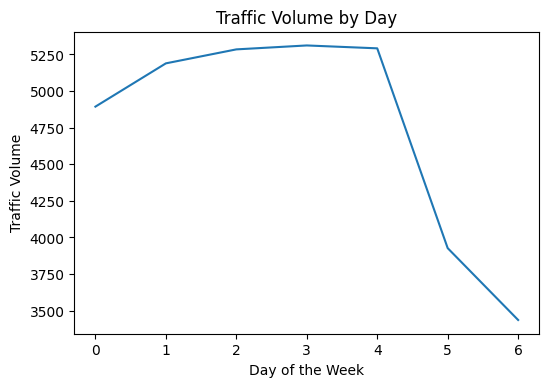

In [24]:
by_dayofweek['traffic_volume'].plot.line()
plt.title('Traffic Volume by Day')
plt.xlabel('Day of the Week')
plt.ylabel('Traffic Volume')
plt.show()

This graph makes sense. Most of the traffic is on weekdays, as people are driving to work and back. Weekends have less traffic because not as many people work on those days.

# Visualizing how Traffic Volume Changes by Time of Day

It's now pivotal to view how traffic fluctuates over each day. Because there is such a large difference between weekdays and weekends, we will conduct analysis separately. 

In [28]:
day['hour'] = day['date_time'].dt.hour
business_days = day.copy()[day['dayofweek'] <= 4]
weekend_days = day.copy()[day['dayofweek'] >= 5]
by_hour_business = business_days.groupby('hour').mean()
by_hour_weekend = weekend_days.groupby('hour').mean()

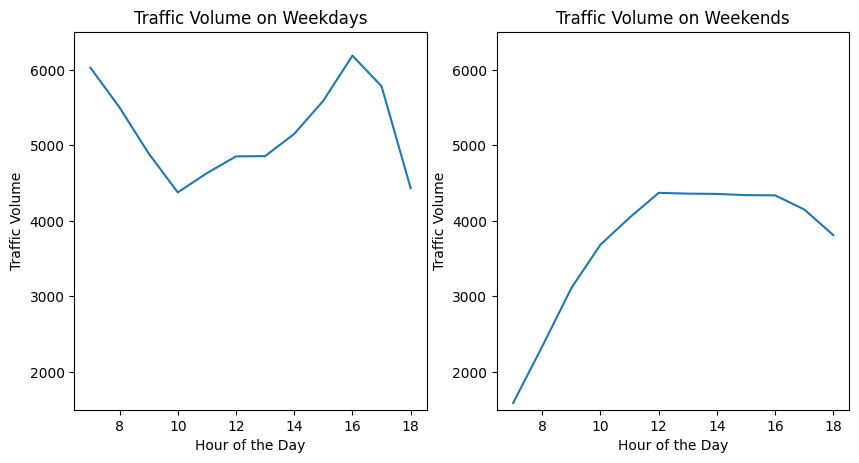

In [31]:
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
by_hour_business['traffic_volume'].plot.line()
plt.title('Traffic Volume on Weekdays')
plt.xlabel('Hour of the Day')
plt.ylabel('Traffic Volume')
plt.ylim([1500,6500])

plt.subplot(1,2,2)
by_hour_weekend['traffic_volume'].plot.line()
plt.title('Traffic Volume on Weekends')
plt.xlabel('Hour of the Day')
plt.ylabel('Traffic Volume')
plt.ylim([1500,6500])
plt.show()

It's clear that on the weekends traffic peaks at times when people arrive/depart from work - 8am and 4/5pm. On the weekends though, traffic peaks during the afternoon from lunch to dinner, as people are going showing or eating. 

# Weather

One factor we haven't considered is the weather influencing traffic levels. There are quite a few columns identifying weather patterns in this dataset such as:
- temp
- rain_1h
- snow_1h
- clouds_all
- weather_main
- weather_description

In [33]:
day.corr()['traffic_volume']

temp              0.128317
rain_1h           0.003697
snow_1h           0.001265
clouds_all       -0.032932
traffic_volume    1.000000
month            -0.022337
dayofweek        -0.416453
year             -0.003557
hour              0.172704
Name: traffic_volume, dtype: float64

This marks the correlation between traffic volume and other variables. It's clear that traffic increases with a rise in temperature, as well as snow and rain. Traffic decreases seemingly when clouds are present. But, it's clear that temperature has the highest correlation, so let's look into that further. 

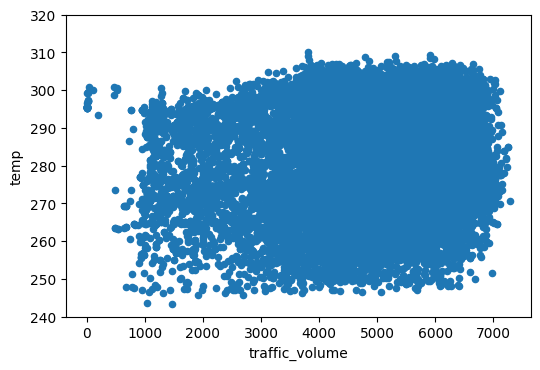

In [36]:
day.plot.scatter('traffic_volume','temp')
plt.ylim([240,320])
plt.show()

Temp, although having the highest correlation factor, doesn't display a positive indicator of heavier traffic. 

# Weather Types 

Now let's look at some of the more descriptive weather patterns, and see how they influence traffic. To start we'll look at 'weather_main' and 'traffic_volume'.

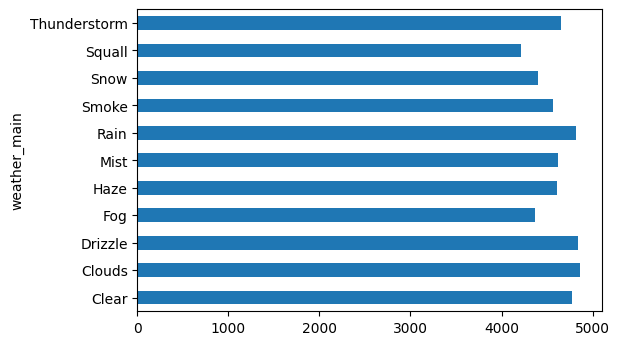

In [40]:
by_weather_main = day.groupby('weather_main').mean()
by_weather_main['traffic_volume'].plot.barh()
plt.show()

There are no factors that have a traffic volume over 5000 cars. The weather types with highest impact seem to be rain, drizzle, clouds and clear. 

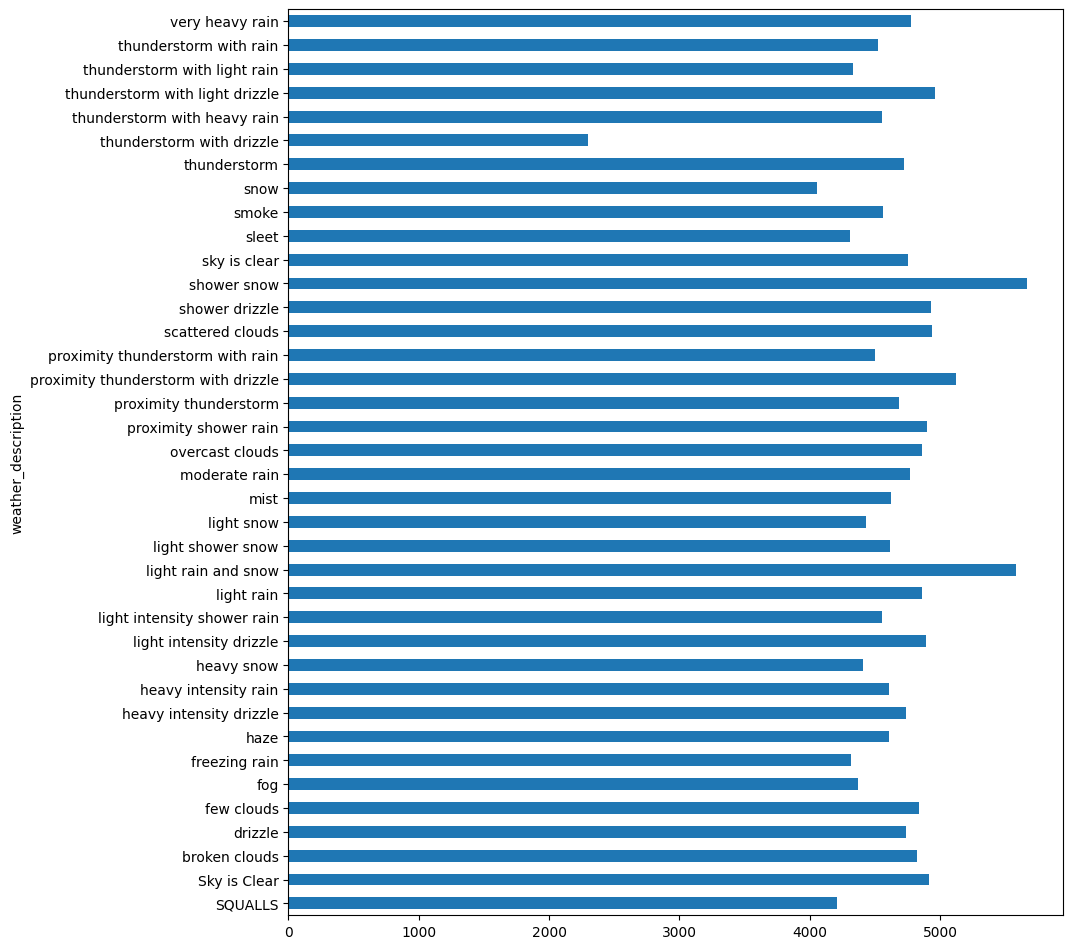

In [41]:
by_weather_description = day.groupby('weather_description').mean()
by_weather_description['traffic_volume'].plot.barh(figsize=(10,12))

This is a bit more obvious. There are 3 factors that increase volume of traffic above 5000:
- Shower Snow
- Light rain and Snow
- Proximity Thunderstorm with Drizzle

The fact that "proximity thunderstorm with drizzle" is so high in traffic volume, when "thunderstorm with drizzle" donates the lowest value is a bit peculiar.

# Conclusion

In this project we were looking at indicators of heavy traffic on the I-94 highway. We found that certain times of the year and week fluctuate the traffic levels on the highway, such as:
- Months of Summer, except July, have the highest records of traffic. 
- Winter months display the lowest amount of traffic.
- Weekdays have increased level of traffic compared to weekends because people have to commute to work. 

But we also found that certain weather factors can indicate heavier traffic, like:
- Shower Snow
- Light rain and Snow
- Proximity Thunderstorm with Drizzle